# Etapas
- compreendimento do negocio ✅
- compreensão dos dados ✅
- tratamento e limpeza dos dados ✅
- analise [extrair informações relevantes para responder perguntas] ✅


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Reennaan/movie-analysis/refs/heads/main/movie.csv')

df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


## Dicionário de dados
- Series_Title – Nome do filme
- Released_Year - Ano de lançamento
- Certificate - Classificação etária
- Runtime – Tempo de duração
- **Genre** - Gênero
- **IMDB_Rating** - Nota do IMDB
- **Overview** - Overview do filme
- **Meta_score** - Média ponderada de todas as críticas
- **Director** – Diretor
- Star1 - Ator/atriz #1
- Star2 - Ator/atriz #2
- Star3 - Ator/atriz #3
- Star4 - Ator/atriz #4
- No_of_Votes - Número de votos
- **Gross** - Faturamento


In [ ]:
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


## Limpeza de dados

In [ ]:
df1 = df.copy();

In [ ]:
df1 = df1.drop(["Unnamed: 0"], axis=1)

In [ ]:
df1.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


# Dados faltantes

aqui eu me deparei com o primeiro problema, existiam dados faltantes em gross que é o dado mais relevante na análise. a minha solução para isso foi descartar 17% do dataframe, 83% ainda é útil

In [ ]:
print("{:.0%}".format(df1["Gross"].count() / df1.shape[0]))

83%


In [ ]:
df1["Gross"] = df1["Gross"].str.replace(',', '', regex=False).astype(float)

In [ ]:
df1 = df1.dropna(subset=["Gross"])

In [ ]:
# @title Adicionando a nota do IMDB às notas nullas de meta_score
df1['Meta_score'] = df1['Meta_score'].fillna(df1['IMDB_Rating'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 996
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   830 non-null    object 
 1   Released_Year  830 non-null    object 
 2   Certificate    784 non-null    object 
 3   Runtime        830 non-null    object 
 4   Genre          830 non-null    object 
 5   IMDB_Rating    830 non-null    float64
 6   Overview       830 non-null    object 
 7   Meta_score     830 non-null    float64
 8   Director       830 non-null    object 
 9   Star1          830 non-null    object 
 10  Star2          830 non-null    object 
 11  Star3          830 non-null    object 
 12  Star4          830 non-null    object 
 13  No_of_Votes    830 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(3), int64(1), object(11)
memory usage: 103.8+ KB


## Análise exploratória



In [ ]:
# @title Matriz de correlação

df1["Runtime"] = pd.to_numeric(df1["Runtime"].str.replace(" min", "", regex=False),errors="coerce")



dfnum = df1.select_dtypes(include=[np.number])
dfcorrelation = dfnum.corr();
dfcorrelation

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Runtime,1.000000,0.246480,-0.080061,0.172266,0.140002
IMDB_Rating,0.246480,1.000000,0.022429,0.535900,0.099393
Meta_score,-0.080061,0.022429,1.000000,0.213179,0.151481
No_of_Votes,0.172266,0.535900,0.213179,1.000000,0.589527
Gross,0.140002,0.099393,0.151481,0.589527,1.000000


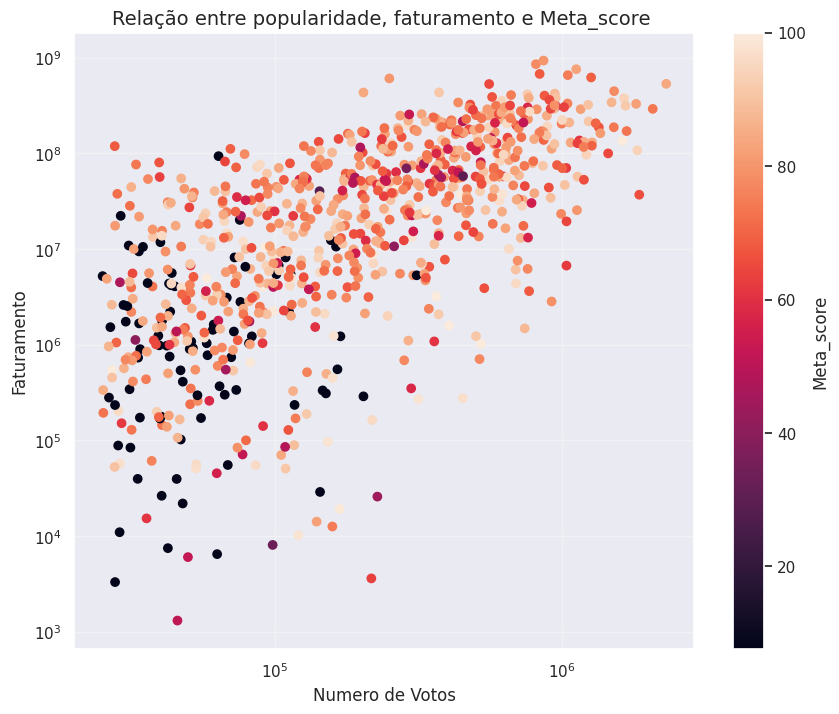

In [ ]:
# @title Relação entre popularidade, Faturamento e Meta_score
plt.figure(figsize=(10,8))
scatter = plt.scatter(df1['No_of_Votes'], df1['Gross'],c=df1["Meta_score"])
plt.colorbar(scatter, label='Meta_score')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Numero de Votos')
plt.ylabel('Faturamento')
plt.title('Relação entre popularidade, faturamento e Meta_score ', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# @title Genero mais lucrativo
df1.groupby("Genre")[["No_of_Votes","Gross","Meta_score"]].mean().sort_values("Gross",ascending=False).head(1)

,No_of_Votes,Gross,Meta_score
Genre,,,
"Family, Sci-Fi",372490.0,435110554.0,91.0


In [ ]:
# @title Um dos generos que se destacam é o drama que está incluso 72% dos filmes enquanto os filmes noir representam somente 1%
generos_list = df1["Genre"].str.split(', ').explode();
generos_contagem = generos_list.value_counts();
print(generos_contagem.index[0],"{:.0%}".format(generos_contagem.max() / df1.shape[0]))
print(generos_contagem.index[-1],"{:.0%}".format(generos_contagem.min() / df1.shape[0]))


Drama 72%
Film-Noir 1%


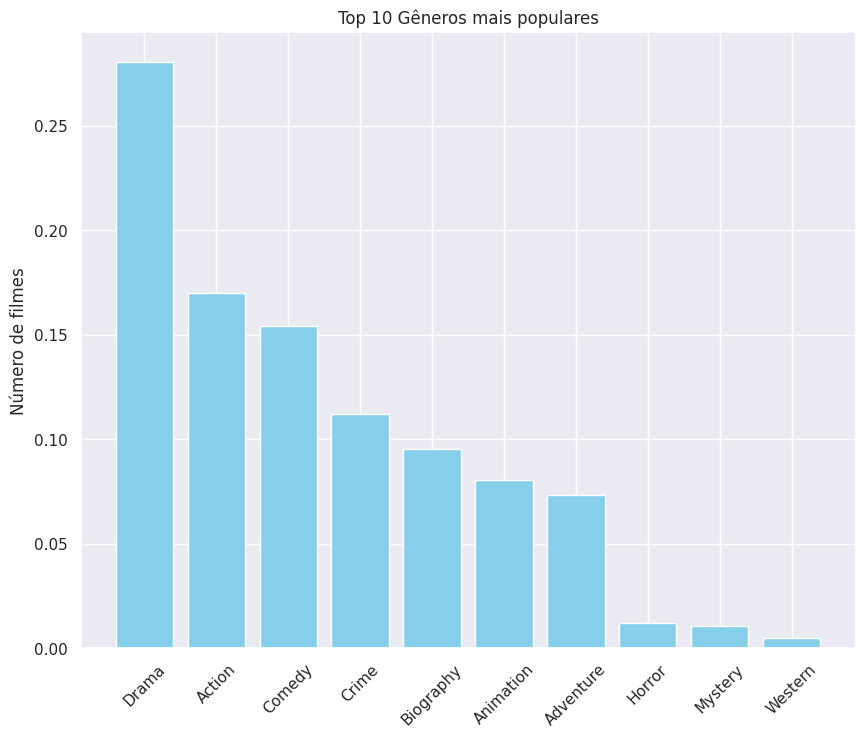

In [ ]:
# @title Grafico apontando para os generos primarios dos filmes mais populares
generos_principal = df1["Genre"].str.split(', ').str[0]
generos_contagem = generos_principal.value_counts(10);


plt.figure(figsize=(10,8))
plt.bar(generos_contagem.head(10).index, generos_contagem.head(10), color="skyblue")
plt.ylabel("Número de filmes")
plt.title("Top 10 Gêneros mais populares")
plt.xticks(rotation=45)
plt.show();

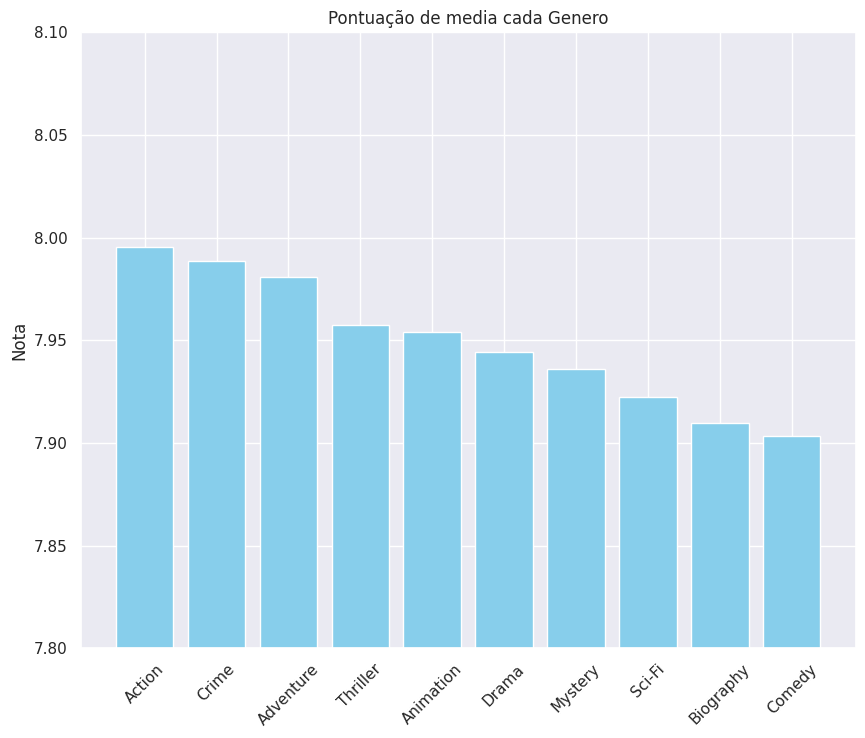

In [ ]:
# @title Pontuação média por cada gênero baseada no IMDB
genero_df = df1.copy()
genero_df["Genre"] = df1["Genre"].str.split(', ').explode("Genre")
contagem = genero_df.groupby("Genre").size();

genero_qualificado = genero_df[genero_df["Genre"].isin(contagem[contagem >= 20].index)]


qualidade_genero = genero_qualificado.groupby("Genre")["IMDB_Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.bar(qualidade_genero.head(10).index, qualidade_genero.head(10), color="skyblue")
plt.xlabel("")
plt.ylabel("Nota")
plt.title("Pontuação de media cada Genero")
plt.xticks(rotation=45)
plt.ylim(7.8, 8.1)
plt.show();



In [ ]:
# @title Os 10 diretores mais lucrativos
df1.groupby("Director")[["Gross","IMDB_Rating","No_of_Votes"]].median().sort_values("Gross", ascending=False).head(10)

,Gross,IMDB_Rating,No_of_Votes
Director,,,
Anthony Russo,543449915.5,8.1,773068.5
Gareth Edwards,532177324.0,7.8,556608.0
Josh Cooley,434038008.0,7.8,203177.0
Roger Allers,422783777.0,8.5,942045.0
Tim Miller,363070709.0,8.0,902669.0
James Gunn,361494850.5,7.8,806714.5
Byron Howard,341268248.0,8.0,434143.0
David Leitch,324591735.0,7.7,478586.0
Joss Whedon,324397032.0,7.9,772058.0


In [ ]:
# @title O Filme mais popular
df1.sort_values(['No_of_Votes', 'Meta_score'], ascending=[False,False]).head(1)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


In [ ]:
# @title As classificações indicativas UA e U tem as maiores bilheterias
df1.groupby("Certificate")["Gross"].mean().sort_values(ascending=False).head()

,Gross
Certificate,
UA,1.311460e+08
U,8.724658e+07
A,6.408571e+07
G,4.959633e+07
PG-13,3.694786e+07


In [ ]:
# @title Atores mais populares
stars_df = pd.concat([
  df1[["Star1","Gross","IMDB_Rating","Meta_score"]].rename(columns={"Star1":"actor"}),
  df1[["Star2","Gross","IMDB_Rating","Meta_score"]].rename(columns={"Star2":"actor"}),
  df1[["Star3","Gross","IMDB_Rating","Meta_score"]].rename(columns={"Star3":"actor"}),
  df1[["Star4","Gross","IMDB_Rating","Meta_score"]].rename(columns={"Star4":"actor"})
])




result = stars_df.groupby("actor").agg({"IMDB_Rating":["median", "count"], "Meta_score": "median", "Gross":"median"})
result.columns = ['Median_IMDB', 'Num_Filmes', 'Median_Meta_score', 'Median_Gross']
result = result.reset_index()

relevant_actor = result[result["Num_Filmes"] >= 5]

relevant_actor.sort_values("Median_IMDB", ascending=False).head(10)


,actor,Median_IMDB,Num_Filmes,Median_Meta_score,Median_Gross
329,Charles Chaplin,8.40,5,8.4,288475.0
1209,Kevin Spacey,8.30,5,77.0,64616940.0
874,Jack Nicholson,8.25,6,75.0,122192157.5
775,Harrison Ford,8.25,8,83.0,222665888.5
2166,Viggo Mortensen,8.20,5,82.0,85080171.0
0,Aamir Khan,8.20,7,8.4,2197331.0
1403,Mark Ruffalo,8.15,6,76.0,221535611.5
904,James Stewart,8.10,5,96.0,9600000.0
1024,Joaquin Phoenix,8.10,5,72.0,119519402.0
1284,Leonardo DiCaprio,8.10,11,75.0,142502728.0


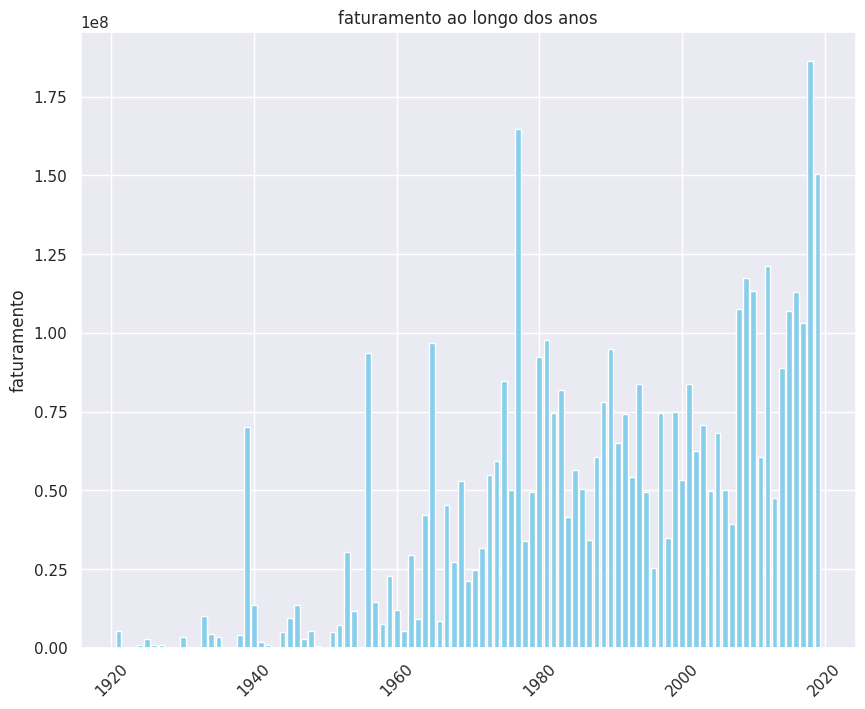

In [ ]:
# @title Faturamento dos filmes ao longo dos anos
faturamento_anos = df1.copy()

faturamento_anos = faturamento_anos[faturamento_anos["Released_Year"] != "PG"]
faturamento_anos["Released_Year"] = faturamento_anos["Released_Year"].astype(int)
faturamento_anos = faturamento_anos.groupby("Released_Year")["Gross"].mean()


faturamento_anos = faturamento_anos.sort_index()

plt.figure(figsize=(10,8))
plt.bar(faturamento_anos.index, faturamento_anos, color="skyblue")
plt.xlabel("")
plt.ylabel("faturamento")
plt.title("faturamento ao longo dos anos")
plt.xticks(rotation=45)
plt.show();


In [ ]:
# @title E.T e Star Wars foram os grandes culpados da anomalia dos anos 70-80 no gráfico acima
filmes_70_80 = df1[df1["Released_Year"] != "PG"]
filmes_70_80 = filmes_70_80[ (filmes_70_80["Released_Year"].astype(int) >= 1975) & (filmes_70_80["Released_Year"].astype(int) <= 1985) ]
filmes_70_80.groupby("Series_Title")[["Gross","IMDB_Rating","No_of_Votes"]].mean().sort_values("Gross",ascending=False).head(10)


,Gross,IMDB_Rating,No_of_Votes
Series_Title,,,
E.T. the Extra-Terrestrial,435110554.0,7.8,372490.0
Star Wars,322740140.0,8.6,1231473.0
Star Wars: Episode VI - Return of the Jedi,309125409.0,8.3,950470.0
Star Wars: Episode V - The Empire Strikes Back,290475067.0,8.7,1159315.0
Jaws,260000000.0,8.0,543388.0
Raiders of the Lost Ark,248159971.0,8.4,884112.0
Ghostbusters,238632124.0,7.8,355413.0
Back to the Future,210609762.0,8.5,1058081.0
Close Encounters of the Third Kind,132088635.0,7.6,184966.0


## Com o faturamento de E.T. the Extra-Terrestrial seria possível comprar um famicom para cada morador de recife e ainda sobraria dinheiro para comprar 2862186 gameboys


In [ ]:

famicom_recife = filmes_70_80.groupby("Series_Title")[["Gross","IMDB_Rating","No_of_Votes"]].mean().sort_values("Gross",ascending=False).head(1)
gross_value = famicom_recife["Gross"].iloc[0]
famicom = 100
habitantesrecife = 1488920
gameboy = 90
gross_value = gross_value/ famicom - habitantesrecife
print(f"famicom para cada morador de recife (aproximadamente {habitantesrecife})")
gameboy_cont =  gross_value * 100 / gameboy
print(f"o que sobraria em gameboys {gross_value:.0f}")


famicom para cada morador de recife (aproximadamente 1488920)
o que sobraria em gameboys 2862186


## Insights da coluna overview
  Aqui podemos observar as palavras mais utilizadas no overview de todos os filmes e também as que estão atreladas aos filmes com maior popularidade. o que podemos concluir aqui é que se a PProductions contratasse alguns stormtrooper para perseguir o chewbacca e Charles Chaplin pelo universo e colocasse o Anthony Russo na direção, a popularidade desse filme seria astronomica.

In [ ]:



alloverviews = df1[["Genre","Overview","Gross"]].copy()
alloverviews["word"] = alloverviews["Overview"].str.lower().str.split()
alloverviews =  alloverviews.explode("word")
alloverviews["word"] =  alloverviews["word"].str.replace(r'[^a-z]', '', regex=True)

alloverviews =  alloverviews[alloverviews["word"].str.len() > 4]

useless_words = {"with","from","their","into","after","they","that",
                 "during","must","when","while","between","them","young",
                 "finds","other","over","life","world","mutant","fellow",
                 "years","three","about","himself","takes","first","which",
                 "where","story","american","small"}
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopwords_en = set(ENGLISH_STOP_WORDS)

overviwes_count = alloverviews[~alloverviews["word"].isin(useless_words | stopwords_en)].copy()

top_words = overviwes_count["word"].value_counts()
top_gross = overviwes_count.groupby("word")["Gross"].mean().sort_values(ascending=False)

overviwes_count["Genre"] = overviwes_count["Genre"].str.split(', ')
overviwes_count = overviwes_count.explode("Genre");



action_words = overviwes_count[overviwes_count["Genre"] == "Action"]["word"].value_counts().head(150).index.tolist()
horror_words = overviwes_count[overviwes_count["Genre"] == "Horror"]["word"].value_counts().head(150).index.tolist()
romance_words = overviwes_count[overviwes_count["Genre"] == "Romance"]["word"].value_counts().head(150).index.tolist()

top_wordsdf = top_words.head(10).reset_index()
top_wordsdf.columns = ["Palavra mais comum","frequency"]


top_grossdf = top_gross.head(10).reset_index()
top_grossdf.columns = ["Palavra mais popular","Meta_score"]

tab = pd.concat([top_wordsdf, top_grossdf],axis=1)




tab.head(10)

#print(f'crime: {action_words}')
#print(f'horror: {horror_words}')
#print(f'romance: {romance_words}')

,Palavra mais comum,frequency,Palavra mais popular,Meta_score
0,family,50,exstormtrooper,936662225.0
1,woman,49,chewbacca,936662225.0
2,friends,35,scavenger,936662225.0
3,father,31,restoring,936662225.0
4,lives,29,reverse,858373000.0
5,mysterious,28,infinity,858373000.0
6,murder,26,balance,858373000.0
7,group,25,restore,858373000.0
8,tries,25,actions,858373000.0
9,school,24,ruins,858373000.0


In [ ]:
# @title inferir genero com valores do dataframe
overview_analysis =  df1["Overview"].copy()




def inferir_genero(overview_analysis):
  action_points = 0
  horror_points = 0
  romance_points = 0
  words = overview_analysis.lower().split()

  for word in words:
    if word in action_words:
      action_points += 1

    if word in horror_words:
      horror_points += 1

    if word in romance_words:
      romance_points += 1


  return action_points, horror_points, romance_points;



filme = df1[df1["Series_Title"].str.contains("Kill Bill: Vol. 1")]["Overview"].values[0]
filme = filme.lower()
#print(filme)
action_points,horror_points,romance_points = inferir_genero(filme)
#Recomendação de testes
#Action:The Dark Knight, Kill Bill: Vol. 1, Star Wars
#Horror: Psycho, Alien, The Thing
#Romance: Titanic, Rebecca, Gone with the Wind

print(f"Pontuação para action: {action_points}")
print(f"Pontuação para horror: {horror_points}")
print(f"Pontuação para romance: {romance_points}")

Pontuação para action: 3
Pontuação para horror: 0
Pontuação para romance: 0


In [ ]:
# @title Atribuindo uma nota no IMDB com base no meta score
df2 = df1.copy()

df2["Meta_score_normalized"] = df2["Meta_score"] / 10
df2["diff"] = df2["IMDB_Rating"] - df2["Meta_score_normalized"]
media_imdb = df2["diff"].mean()
print(df2["diff"].mean())

guess_imdb_rating = {'Series_Title': 'The Shawshank Redemption',
 'Meta_score': 80.0,
 'No_of_Votes': 2343110,
 }

guess_imdb_rating["IMDB_Rating"] = guess_imdb_rating["Meta_score"] / 10 + media_imdb
print(guess_imdb_rating["IMDB_Rating"])




0.8768915662650602
8.87689156626506


In [ ]:
# @title Previsão da nota do IMDB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import joblib


x, y = df1[["Meta_score", "No_of_Votes"]], df1["IMDB_Rating"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(x_train, y_train)

mae = mean_absolute_error(y_test, model.predict(x_test))
print(f"MAE: {mae:.2f}")



guess_imdb_rating = pd.DataFrame({
    'Series_Title': ['The Shawshank Redemption'],
    'Meta_score': [80.0],
    'No_of_Votes': [2343110]

})

x_shawshank = guess_imdb_rating[["Meta_score", "No_of_Votes"]]


nota = model.predict(x_shawshank)[0]

print(f"Nota prevista: {nota:.1f}")

joblib.dump(model, 'imdb_model.pkl')

MAE: 0.19
Nota prevista: 8.9


['imdb_model.pkl']

## Respostas
- #### Qual filme você recomendaria para uma pessoa que você não conhece?

  R- *The Dark Knight, por ser o mais popular, bem avaliado, estar na classificação indicativa e generos perfeitos*

- #### Quais são os principais fatores que estão relacionados com alta   expectativa de faturamento de um filme?
  
  R- *Com base nas minhas analises o que mais influência no faturamento de um filme é a popularidade(No_of_Votes), e o que influência na popularidade provavelmente é o marketing do filme junto com um gênero amplo e atrativo para a maioria das pessoas, nesse caso, ação e aventura se destacam. outro fator que parece influenciar nos lucros é a classificação indicativa as classificações U e UA normalmente tem as maiores bilheterias*

- #### Quais insights podem ser tirados com a coluna Overview? É possível inferir o  gênero do filme a partir dessa coluna?


  R-*Sim, é possível, inicialmente, tentei fazer de maneira manual adicionando palavras chave para dar match com X genero, mas acabei substituindo por um modelo de classificação que coleta as palavras 150 palavras chaves mais comuns em cada gênero, porém o tramanho do overview geralmente é muito curto, isso torna a classificação um pouco imprecisa por falta de detalhes. o meu codigo consegue classificar 3 generos diferentes action, horror e romance tentei utilizar generos distates para maior precisão na hora de inferir um genero, no final o codigo da uma pontuação para cada gênero considere o que teve a maior pontuação como o gênero inferido (e o da segunda maior pontuação como subgenero, talvez)*



- #### Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


  R- *De início eu fiz de uma maneira bem simples, eu normalizei as notas do Meta_score para dezenas e logo eu subtraí as duas notas e atribui as diferenças a variável e calculei a média. Mas após reler e pesquisar sobre regressão linear eu entendi de fato qual era a proposta do desafio. mas deixei as duas formas mesmo assim. o problema que estamos resolvendo é regressão pois se trata de prever um número contínuo, as variáveis usadas foram Meta_score(critica geral) e No_of_votes(bilheteria/popularidade) o motivo é que essas duas variáveis se provaram ter uma alta correlação durante minhas análises, a performace foi medida pelo mae que indica 0.19 de erro médio na previsão*

## Observações
-  quanto maior o numero de votos (popularidade) maior o faturamento

-  filmes bem avaliados no imdb não necessariamente tendem a um maior faturamento

- Anthony Russo é o diretor mais lucrativo do dataframe

- Action e Adventure são os gêneros mais vistos

- The Godfather de Francis Coppola é o filme mais bem avaliado no IMDB e Metascore

- grandes blockbusters influenciaram em algumas analises

- fui aprendendo conforme trabalhava nesse projeto então provavelmente existem muito espaço para melhorias discrepancias entre as técnicas usadas